In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcardmarketing.csv')
data

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17995,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17996,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17997,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [3]:
data.columns

Index(['1', 'No', 'Air Miles', 'Letter', 'High', '1.1', 'No.1', 'High.1', '2',
       '1.2', '4', 'No.2', '1160.75', '1669', '877', '1095', '1002'],
      dtype='object')

In [4]:
# rename the columns
data.columns=['customer_number','offer_accepted','reward','mailer_type','income_level','bank_accounts_open','overdraft_protection','credit_rating','creditcards_held','homes_owned','household_size','own_your_home','average_balance','q1_balance','q2_balance','q3_balance','q4_balance']
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'creditcards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [5]:
# drop index and customer number as they are hidden
data=data.drop(['customer_number'],axis=1)
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,creditcards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17995,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17996,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17997,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [6]:
# check null data
pd.DataFrame(data.isna().sum()/len(data))

,0
offer_accepted,0.000000
reward,0.000000
mailer_type,0.000000
income_level,0.000000
bank_accounts_open,0.000000
overdraft_protection,0.000000
credit_rating,0.000000
creditcards_held,0.000000
homes_owned,0.000000
household_size,0.000000


In [7]:
# decide to fill with the columns' mean value
# better make a fucntion here 
data['average_balance'] = data['average_balance'].fillna(np.mean(data['average_balance']))
data['q1_balance'] = data['q1_balance'].fillna(np.mean(data['q1_balance']))
data['q2_balance'] = data['q2_balance'].fillna(np.mean(data['q2_balance']))
data['q3_balance'] = data['q3_balance'].fillna(np.mean(data['q3_balance']))
data['q4_balance'] = data['q4_balance'].fillna(np.mean(data['q4_balance']))

In [8]:
# check null again and can move on
pd.DataFrame(data.isnull().sum()/len(data))

,0
offer_accepted,0.0
reward,0.0
mailer_type,0.0
income_level,0.0
bank_accounts_open,0.0
overdraft_protection,0.0
credit_rating,0.0
creditcards_held,0.0
homes_owned,0.0
household_size,0.0


In [9]:
data.dtypes

offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
creditcards_held          int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [10]:
# drop the outliers
data['household_size'].value_counts()

3    5712
4    5542
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: household_size, dtype: int64

In [11]:
data=data[~data['household_size'].isin([8,9])]


In [12]:
data=data.reset_index(drop=True)
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,creditcards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17993,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17994,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17995,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [13]:
pd.DataFrame(data.isnull().sum()/len(data))

,0
offer_accepted,0.0
reward,0.0
mailer_type,0.0
income_level,0.0
bank_accounts_open,0.0
overdraft_protection,0.0
credit_rating,0.0
creditcards_held,0.0
homes_owned,0.0
household_size,0.0


In [14]:
# spilt cat and num data
data_cat = data.select_dtypes(np.object)
data_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No
...,...,...,...,...,...,...,...
17992,No,Cash Back,Letter,High,No,Low,Yes
17993,No,Cash Back,Letter,High,No,Low,Yes
17994,No,Cash Back,Letter,High,No,Low,No
17995,No,Cash Back,Letter,Medium,No,Medium,Yes


In [15]:
data_num = data.select_dtypes(np.number)
data_num

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...
17992,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17993,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17994,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17995,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [16]:
data_num.describe()

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000,17997.000000
mean,1.255820,1.903595,1.203423,3.498472,940.527453,910.495738,999.421269,1042.035380,810.157426
std,0.472528,0.797018,0.427330,1.113008,350.031957,619.633452,457.069953,553.099368,558.586474
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,788.000000,393.000000,664.000000,633.000000,364.000000
50%,1.000000,2.000000,1.000000,3.000000,1006.500000,773.000000,1032.000000,946.000000,704.000000
75%,1.000000,2.000000,1.000000,4.000000,1152.500000,1520.000000,1342.000000,1462.000000,1211.000000
max,3.000000,4.000000,3.000000,6.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


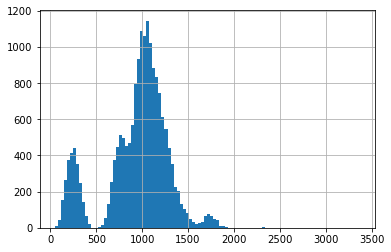

In [17]:
data_num['average_balance'].hist(bins=100)

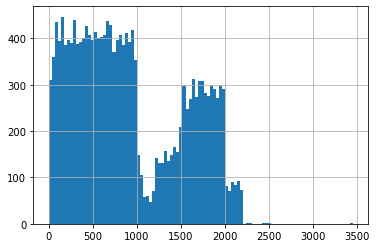

In [18]:
data_num['q1_balance'].hist(bins=100)

In [19]:
# standardscaler num data
from sklearn.preprocessing import StandardScaler

In [20]:
transformer = StandardScaler().fit(data_num)
x_scaled = transformer.transform(data_num)
x_scaled

array([[-0.54140134,  0.12096042,  1.86413074, ..., -1.95472506,
        -1.74301802, -0.79516742],
       [ 1.57493228,  0.12096042, -0.47604511, ..., -1.41649928,
        -1.62187909, -1.0171625 ],
       [ 1.57493228, -1.13375125, -0.47604511, ...,  1.66407758,
         0.13915539, -0.70028243],
       ...,
       [-0.54140134,  0.12096042, -0.47604511, ..., -0.50851675,
         0.23136561,  1.22427163],
       [-0.54140134,  2.63038377,  1.86413074, ..., -0.03592825,
        -0.32008769,  1.44089586],
       [ 1.57493228,  0.12096042, -0.47604511, ...,  0.82829608,
         1.69226486, -0.37087039]])

In [21]:
x_full_scaled=pd.DataFrame(x_scaled,columns=data_num.columns.tolist())
x_full_scaled

,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,-0.541401,0.120960,1.864131,1.349110,-2.266363,-1.406509,-1.954725,-1.743018,-0.795167
1,1.574932,0.120960,-0.476045,-1.346364,-1.897101,-0.877149,-1.416499,-1.621879,-1.017162
2,1.574932,-1.133751,-0.476045,0.450618,0.795585,1.077287,1.664078,0.139155,-0.700282
3,-0.541401,0.120960,-0.476045,2.247601,0.772730,1.984300,0.782350,-0.108547,-0.796958
4,-0.541401,1.375672,-0.476045,0.450618,0.497747,1.511426,0.799853,-0.528013,-0.560640
...,...,...,...,...,...,...,...,...,...
17992,-0.541401,-1.133751,-0.476045,1.349110,-2.208510,-1.249960,-2.044429,-1.755674,-0.737878
17993,-0.541401,1.375672,-0.476045,-0.447873,-0.257205,0.118629,-0.130008,-0.179060,-0.492610
17994,-0.541401,0.120960,-0.476045,0.450618,0.419181,0.012111,-0.508517,0.231366,1.224272
17995,-0.541401,2.630384,1.864131,-1.346364,0.233478,-0.459148,-0.035928,-0.320088,1.440896


In [22]:
# check multicorr
data_corr=data[['bank_accounts_open','creditcards_held','homes_owned','household_size','average_balance','q1_balance','q2_balance','q3_balance','q4_balance']]

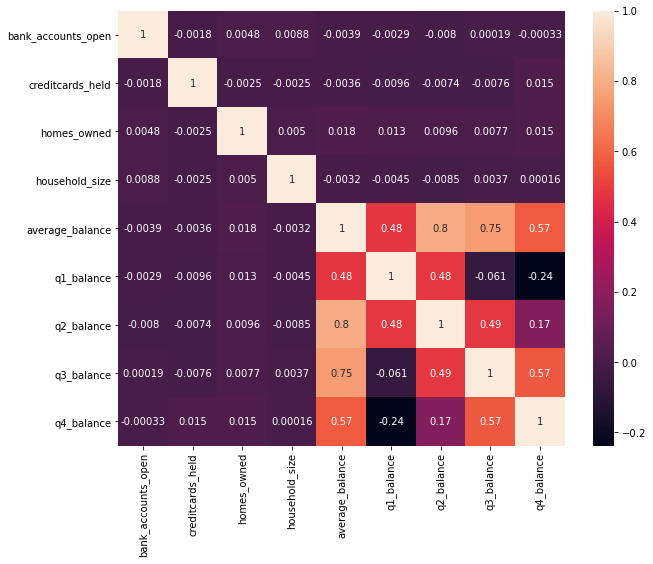

In [23]:
# 0.8 is just on the limit, may keep it now
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [24]:
# check cat data if they are needed
data['offer_accepted'].value_counts()

No     16975
Yes     1022
Name: offer_accepted, dtype: int64

In [25]:
data['reward'].value_counts()

Air Miles    6059
Cash Back    5999
Points       5939
Name: reward, dtype: int64

In [26]:
data['mailer_type'].value_counts()

Postcard    9145
Letter      8852
Name: mailer_type, dtype: int64

In [27]:
data['income_level'].value_counts()

Medium    9013
High      4523
Low       4461
Name: income_level, dtype: int64

In [28]:
data['overdraft_protection'].value_counts()

No     15320
Yes     2677
Name: overdraft_protection, dtype: int64

In [29]:
data['credit_rating'].value_counts()

High      6070
Medium    5972
Low       5955
Name: credit_rating, dtype: int64

In [30]:
data['own_your_home'].value_counts()

Yes    11655
No      6342
Name: own_your_home, dtype: int64

In [31]:
# income level and credit rate have ordinal values, do with label encoding
import category_encoders as ce

In [32]:
encoder_income=ce.OrdinalEncoder(cols=['income_level'],return_df=True,mapping=[{'col':'income_level','mapping':{'Low':0,'Medium':1,'High':2}}])

In [33]:
income_trans=encoder_income.fit_transform(data['income_level'])

In [34]:
income_trans

,income_level
0,1
1,2
2,1
3,1
4,1
...,...
17992,2
17993,2
17994,2
17995,1


In [35]:
encoder_rating=ce.OrdinalEncoder(cols=['credit_rating'],return_df=True,mapping=[{'col':'credit_rating','mapping':{'Low':0,'Medium':1,'High':2}}])
rating_trans=encoder_rating.fit_transform(data['credit_rating'])
rating_trans

,credit_rating
0,1
1,1
2,2
3,1
4,2
...,...
17992,0
17993,0
17994,0
17995,1


In [36]:
# settle cat data
data_cat=data_cat.drop(['income_level','credit_rating'],axis=1)

In [37]:
data_cat

,offer_accepted,reward,mailer_type,overdraft_protection,own_your_home
0,No,Air Miles,Letter,No,Yes
1,No,Air Miles,Postcard,No,Yes
2,No,Air Miles,Letter,No,No
3,No,Air Miles,Letter,No,Yes
4,No,Air Miles,Letter,No,No
...,...,...,...,...,...
17992,No,Cash Back,Letter,No,Yes
17993,No,Cash Back,Letter,No,Yes
17994,No,Cash Back,Letter,No,No
17995,No,Cash Back,Letter,No,Yes


In [38]:
# get dummies
cat_encoded=pd.get_dummies(data_cat,drop_first=True)
cat_encoded

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,0,0,0,0,0,1
1,0,0,0,1,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
17992,0,1,0,0,0,1
17993,0,1,0,0,0,1
17994,0,1,0,0,0,0
17995,0,1,0,0,0,1


In [39]:
# concat all data together
data=pd.concat([cat_encoded,income_trans,rating_trans,x_full_scaled],axis=1)
data

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes,income_level,credit_rating,bank_accounts_open,creditcards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0,0,0,0,0,1,1,1,-0.541401,0.120960,1.864131,1.349110,-2.266363,-1.406509,-1.954725,-1.743018,-0.795167
1,0,0,0,1,0,1,2,1,1.574932,0.120960,-0.476045,-1.346364,-1.897101,-0.877149,-1.416499,-1.621879,-1.017162
2,0,0,0,0,0,0,1,2,1.574932,-1.133751,-0.476045,0.450618,0.795585,1.077287,1.664078,0.139155,-0.700282
3,0,0,0,0,0,1,1,1,-0.541401,0.120960,-0.476045,2.247601,0.772730,1.984300,0.782350,-0.108547,-0.796958
4,0,0,0,0,0,0,1,2,-0.541401,1.375672,-0.476045,0.450618,0.497747,1.511426,0.799853,-0.528013,-0.560640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,0,1,0,0,0,1,2,0,-0.541401,-1.133751,-0.476045,1.349110,-2.208510,-1.249960,-2.044429,-1.755674,-0.737878
17993,0,1,0,0,0,1,2,0,-0.541401,1.375672,-0.476045,-0.447873,-0.257205,0.118629,-0.130008,-0.179060,-0.492610
17994,0,1,0,0,0,0,2,0,-0.541401,0.120960,-0.476045,0.450618,0.419181,0.012111,-0.508517,0.231366,1.224272
17995,0,1,0,0,0,1,1,1,-0.541401,2.630384,1.864131,-1.346364,0.233478,-0.459148,-0.035928,-0.320088,1.440896


In [40]:
# X-Y split
y=data['offer_accepted_Yes']
X_rest=data.drop(['offer_accepted_Yes'],axis=1)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_rest,y,test_size=0.7,random_state=100)

In [43]:
# training KNN
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn_model=KNeighborsRegressor(n_neighbors=5)

In [45]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor()

In [77]:
knn_predictions=knn_model.predict(X_test)

In [78]:
MAE=mean_absolute_error(y_test,knn_predictions)
MAE

0.10101603429115733

In [79]:
MSE=mean_squared_error(y_test,knn_predictions)
MSE

0.06130814414986507

In [80]:
RMSE=np.sqrt(MSE)
RMSE

0.24760481447230598

In [81]:
R2=r2_score(y_test,knn_predictions)
R2

-0.13626428637407662

In [82]:
scores = []
for i in range(2,20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

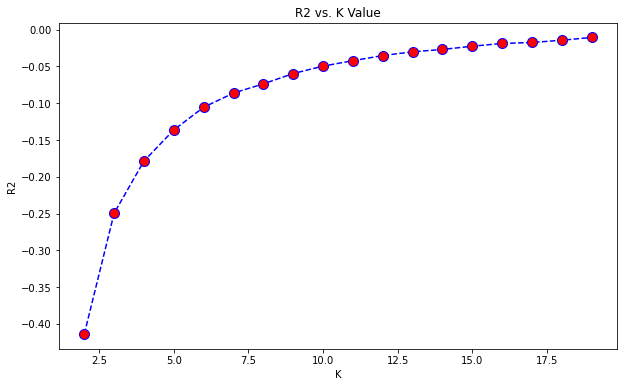

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [47]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11843    34]
 [  714     7]]


In [51]:
accuracy_score(y_test,y_pred)

0.9406254961104937

In [52]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

14.454992856008891

In [53]:
MSE=mean_squared_error(y_test,y_pred)
MSE

0.05937450388950627

In [54]:
RMSE=np.sqrt(MSE)
RMSE

0.24366884062084398

In [55]:
R2=r2_score(y_test,y_pred)
R2

-0.10042685562148379

In [64]:
# imbalance data
num=data[['q1_balance','q2_balance','q3_balance','q4_balance']]
Y=pd.DataFrame(data=data,columns=['offer_accepted_Yes'])

In [65]:
transformer=StandardScaler().fit(num)

In [66]:
scaled_x=transformer.transform(num)

In [67]:
classification=LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(scaled_x,data['offer_accepted_Yes'])

In [68]:
classification.score(scaled_x,data['offer_accepted_Yes'])

0.9432127576818359

In [69]:
data['offer_accepted_Yes'].value_counts()

0    16975
1     1022
Name: offer_accepted_Yes, dtype: int64

In [70]:
# score is not good enough
16975/(16975+1022)

0.9432127576818359

In [71]:
# increase data imbalance
yes=data[data['offer_accepted_Yes']==1]
no=data[data['offer_accepted_Yes']==0]

In [72]:
yes=yes.sample(500)

In [73]:
data1=pd.concat([yes,no],axis=0)
data1['offer_accepted_Yes'].value_counts()

0    16975
1      500
Name: offer_accepted_Yes, dtype: int64

In [74]:
data1=data1.sample(frac=1)

In [75]:
num1=data1[['q1_balance','q2_balance','q3_balance','q4_balance']]
transformer = StandardScaler().fit(num1)
scaled_x1 = transformer.transform(num1)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x1, data1['offer_accepted_Yes'])
classification.score(scaled_x1, data1['offer_accepted_Yes'])

0.9713876967095851

In [76]:
counts = data['offer_accepted_Yes'].value_counts()
yes1 = data[data['offer_accepted_Yes']=='Yes'].sample(counts[0], replace=True)
no1 = data[data['offer_accepted_Yes']=='No']
data2 = pd.concat([yes,no], axis=0)
data2 = data2.sample(frac=1)
data2['offer_accepted_Yes'].value_counts()

/Users/qiqinyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: a must be greater than 0 unless no samples are taken